## 8.4 Principal Component Regression

- We can determine the principal components of our data set from a singular value decomposition (SVD) of the
coveriance matrix $X^{T}X$:

$$X^{T}X=V\Sigma V^{T}$$

- Projecting the data onto the principal components defines a new data set

$$Z=XV^{T}$$

- We can truncate the new set of vectors to exclude components with small eigenvalues (features/dimensions that contribute little variance)

- Principal component regression:

$$ \vec{w}_{\text{PCA}}=\left( \begin{array}{c}
1 \\
1 \\
1 \\
0 \\
\vdots\\
0 \end{array}\right)
\hskip{1in}
M_{\text{z}}=\left( \begin{array}{ccc}
1 & z_{01} & z_{02} & z_{03} & 0 & \cdots & 0 \\
1 & z_{11} & z_{12} & z_{13} & 0 & \cdots & 0 \\
1 & z_{21} & z_{22} & z_{23} & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & z_{N1} & z_{N2} & z_{N3} & 0 & \cdots & 0 \end{array}\right)
$$

- PCA has an advantage over ridge regression when the data contains many independent collinear variables (high covariance)

- In this case the regression coefficients $\theta_{i}$ have high variance and their solutions can become unstable


In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random as ra
from scipy.stats import multivariate_normal
import scipy.interpolate

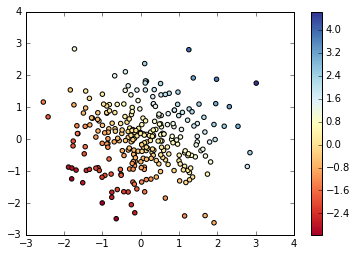

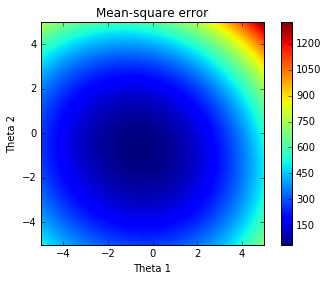

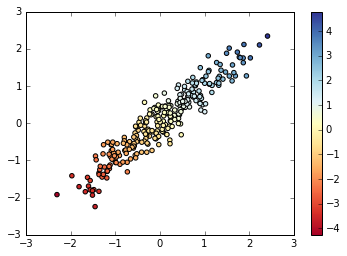

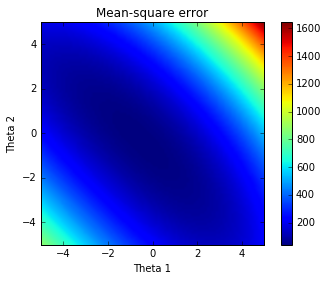

In [2]:
for covar in [0,0.95]:
    
    #Generate bivariate norm distribution
    var = multivariate_normal(mean = [0,0], cov = [[1,covar],[covar,1]])

    #Randomly draw x1, x2 values from pdf
    x1 = []
    x2 = []
    for i in range(1,30000):
        x1rand = 10.*ra.random()-5
        x2rand = 10.*ra.random()-5
        norm_chance = var.pdf([x1rand, x2rand])
        const_chance = ra.random()
        if const_chance <= norm_chance:
            x1.append(x1rand)
            x2.append(x2rand)
    
    
    #Plot (x1, x2; y) data
    alpha = 1
    beta = 0.3
    l = 0.2
    y = [1*x1[i] + 1*x2[i] + beta*(ra.random()-.5) for i in range(len(x1))]
    cm = plt.cm.get_cmap('RdYlBu')
    plt.scatter(x1,x2, c = y, cmap = cm)
    plt.colorbar()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
    
    #Generate cost contour
    th1, th2 = np.linspace(0, 2, 100), np.linspace(0, 2, 100)


    cost = np.zeros((len(th1),len(th2)))
    for i in range(len(th1)):
        for j in range(len(th2)):
            summ=0
            for k in range(len(x1)):
                summ+=(th1[i]*x1[k]+th2[j]*x2[k]-y[k]+l*(th1[i]**2.0+th2[j]**2.0))**2.0
            cost[i,j]=summ
            
    th1, th2 = np.meshgrid(th1, th2)
    
    # Interpolate
    rbf = scipy.interpolate.Rbf(th1, th2, cost, function='linear')
    cost_inter = rbf(th1, th2)
    
    plt.imshow(cost_inter, vmin=cost_inter.min(), vmax=cost_inter.max(), origin='lower', extent=[-5, 5, -5, 5])
    plt.colorbar()
    plt.xlabel('Theta 1')
    plt.ylabel('Theta 2')
    plt.title('Mean-square error')
    plt.show()



## 8.5 Kernel Regression

- Define a kernel $K\left(x_{i}, x\right)$ local to each data point with the amplitude of the kernel depending onn the distance from the local point to all other points in the sample

- e.g. top-hat or Gaussian kernel

- Nadaraya-Watson estimate of the regression function:
$$f\left(x|K\right)=\frac{\sum_{i=1}^{N}K\left(\frac{||x_{i}-x||}{h}\right)y_{i}}{\sum_{i=1}^{N}K\left(\frac{||x_{i}-x||}{h}\right)}$$

- i.e., the predicted value of the function at $x_{i}$ is a weighted average of the y-values of all the points, with the individual weights given by the values of the kernel at that position

- Rule of thumb: bandwidth is more important than shape of kernel used

- Optimal bandwidth can be found by minimizing the cost with respect to the bandwidth on a cross-validation set
$$CV_{L_{2}}\left(h\right)=\frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-f\left(x_{i}|K\left(\frac{||x_{i}-x_{j}||}{h}\right)\right)\right)^{2}$$

#### Author: Jake VanderPlas
#### License: BSD
####   The figure produced by this code is published in the textbook
####   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
####   For more information, see http://astroML.github.com
####   To report a bug or issue, use the following forum:
####    https://groups.google.com/forum/#!forum/astroml-general

![alt text](./fig_8-2.png)

## 8.6 Locally Linear Regression

- Related to kernel regression, but we solve a separate weighted least-squares problem at each point x, finding the weight $w\left(x\right)$ which minimizes
$$\sum_{i=1}^{N}K\left(\frac{||x-x_{i}||}{h}\right)\left(y_{i}-w\left(x\right)x_{i}\right)^{2}$$
- Assume regression function can be approximated as a Taylor series about any local point; truncation at first term (locally constant solution) leads to Kernel regression
- The estimate for locally linear regression is
$$\begin{align}\\
f\left(x|K\right)&=\theta\left(x\right)x\\
&=x^{T}\left(\mathbf{X}^{T}W\left(x\right)\mathbf{X}\right)^{-1}\mathbf{X}^{T}W\left(x\right)\mathbf{Y}\\
&=\sum_{i=1}^{N}w_{i}\left(x\right)y_{i}\\
\end{align}
$$
- where $W\left(x\right)$ is an $N\times N$ diag. matrix with the $i\text{th}$ diaganol element given by $K||x_{i}-x||/h$